In [1]:
using Plots
using LinearAlgebra

In [181]:
function Cp(I,K)
    temp = I*(I+1) - K*(K+1)
    if temp ≥ 0
        return sqrt(temp)
    else
        return 0.0
    end
end

function Cm(I,K)
    temp = I*(I+1) - K*(K-1)
    if temp ≥ 0
        return sqrt(temp)
    else
        return 0.0
    end
end

Cm (generic function with 1 method)

In [182]:
function matrix_element(β, γ, I, Kp, K)
    j₁ = (2β*sin(γ-2π/3))^2
    j₂ = (2β*sin(γ-4π/3))^2
    j₃ = (2β*sin(γ-6π/3))^2
    
    M = 0.0
    if Kp === K
        M += (Cm(I,K)*Cp(I,K-1) + Cp(I,K)*Cm(I,K+1))/8j₁
        M += (Cm(I,K)*Cp(I,K-1) + Cp(I,K)*Cm(I,K+1))/8j₂
        M += K^2/2j₃
    end
    if Kp === K-2
        M += (Cm(I,K)*Cm(I,K-1))*(1/8j₁ - 1/8j₂)
    end
    if Kp === K+2
        M += (Cp(I,K)*Cp(I,K+1))*(1/8j₁ - 1/8j₂)
    end
    
    return M
end

matrix_element (generic function with 1 method)

In [217]:
function make_Hamiltonian(β, γ, I)
    N = div(I+2,2)
    H = zeros(Float64, N, N)
    
    for K in 0:2:I, Kp in 0:2:I
        iK = div(Kp,2) + 1
        jK = div(K ,2) + 1
        
        H[iK, jK] += matrix_element(β, γ, I, Kp, K)
        H[iK, jK] += (-1)^I*matrix_element(β, γ, I, Kp, -K)
        if Kp == 0
            H[iK, jK] /= sqrt(2)
        end
        if K  == 0
            H[iK, jK] /= sqrt(2)
        end
    end
    
    return H
end

make_Hamiltonian (generic function with 1 method)

In [218]:
β = 0.2
γ=π/6
I = 3

H = make_Hamiltonian(β, γ, I)

2×2 Matrix{Float64}:
 0.0    0.0
 0.0  112.5

In [231]:
function diagonalize_Hamiltonian(β, γs; ylim=(0,1000), Imax=4)
    p = plot(ylim=ylim)
    for I in 0:Imax
        N = div(I+2, 2)
        Es = zeros(Float64, N, length(γs))

        for iγ in 1:length(γs)
            H = make_Hamiltonian(β, γs[iγ], I)
            Es[:, iγ] = eigvals(H)
        end
        
        
        for i in 1:N
            plot!(p, γs./(π/3), Es[i,:]; label="I=$I, $i")
        end
        
    end
    p
end

diagonalize_Hamiltonian (generic function with 2 methods)

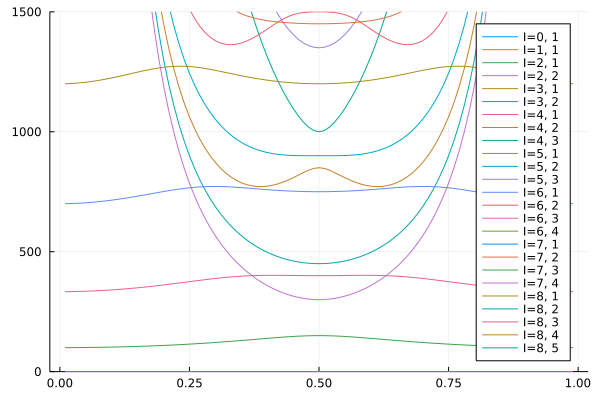

In [235]:
β = 0.1
γs = range(0, π/3, length=100+1)[2:end-1]
I = 2

diagonalize_Hamiltonian(β, γs; ylim=(0,1500), Imax=8)

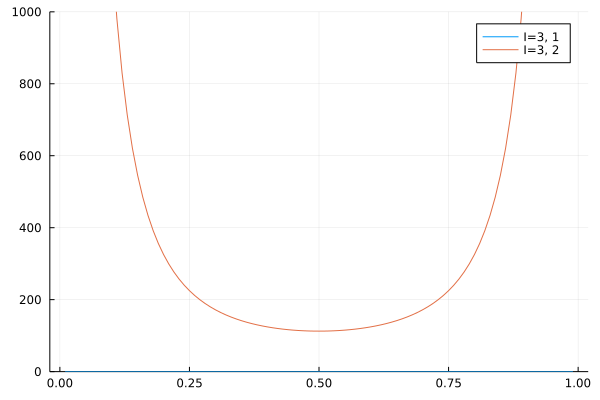

In [216]:
I = 3

diagonalize_Hamiltonian(β, γs, I; ylim=(0,1000))

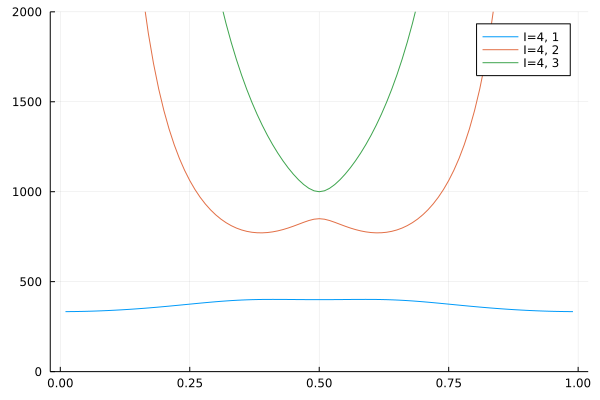

In [211]:
I = 4

diagonalize_Hamiltonian(β, γs, I; ylim=(0,2000))